#📌 Extração

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'
df = pd.read_json(url)
df_flat = pd.json_normalize(df.to_dict(orient='records'))
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#📌 Transformação

In [2]:
# Desaninhando as colunas aninhadas
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

In [3]:
# Renomeando as colunas para evitar conflitos
df_customer.columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']
df_phone.columns = ['PhoneService', 'MultipleLines']
df_internet.columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_account.columns = ['Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']

In [4]:
# Combinando todas as colunas no DataFrame original
df_transformed = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

In [5]:
# Verificando os tipos de dados
print("Tipos de dados das colunas:")
print(df_transformed.dtypes)

Tipos de dados das colunas:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


In [6]:
# Visualizando as primeiras linhas
print("\nPrimeiras 5 linhas do DataFrame transformado:")
print(df_transformed.head().to_markdown(index=False))


Primeiras 5 linhas do DataFrame transformado:
| customerID   | Churn   | gender   |   SeniorCitizen | Partner   | Dependents   |   tenure | PhoneService   | MultipleLines   | InternetService   | OnlineSecurity   | OnlineBackup   | DeviceProtection   | TechSupport   | StreamingTV   | StreamingMovies   | Contract       | PaperlessBilling   | PaymentMethod    |   Charges.Monthly |   Charges.Total |
|:-------------|:--------|:---------|----------------:|:----------|:-------------|---------:|:---------------|:----------------|:------------------|:-----------------|:---------------|:-------------------|:--------------|:--------------|:------------------|:---------------|:-------------------|:-----------------|------------------:|----------------:|
| 0002-ORFBO   | No      | Female   |               0 | Yes       | Yes          |        9 | Yes            | No              | DSL               | No               | Yes            | No                 | Yes           | Yes           | No       

In [7]:
# Aqui verifico se há problemas nos dados
# Verificando valores ausentes
print("\nValores ausentes por coluna:")
print(df_transformed.isna().sum())

# Verificando duplicatas
print("\nNúmero de customerID duplicados:", df_transformed['customerID'].duplicated().sum())

# Verificando valores únicos nas colunas categóricas
categorical_columns = ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                      'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                      'Contract', 'PaperlessBilling', 'PaymentMethod']
print("\nValores únicos nas colunas categóricas:")
for col in categorical_columns:
    print(f"{col}: {df_transformed[col].unique()}")

# Verificando se Charges.Total e Charges.Monthly são numéricos
print("\nTipos de dados de Charges:")
print(df_transformed[['Charges.Monthly', 'Charges.Total']].dtypes)

# Convertendo Charges.Total para float e checando por erros
try:
    df_transformed['Charges.Total'] = pd.to_numeric(df_transformed['Charges.Total'], errors='coerce')
    print("\nValores ausentes em Charges.Total após conversão:", df_transformed['Charges.Total'].isna().sum())
except:
    print("\nErro ao converter Charges.Total para numérico.")


Valores ausentes por coluna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Número de customerID duplicados: 0

Valores únicos nas colunas categóricas:
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No i

In [8]:
# Corrigindo valores ausentes em Charges.Total se houver
if df_transformed['Charges.Total'].isna().sum() > 0:
    median_total = df_transformed['Charges.Total'].median()
    df_transformed['Charges.Total'].fillna(median_total, inplace=True)
    print("\nValores ausentes em Charges.Total preenchidos com a mediana:", median_total)


Valores ausentes em Charges.Total preenchidos com a mediana: 1391.0


/tmp/ipython-input-8-1428884948.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_transformed['Charges.Total'].fillna(median_total, inplace=True)


In [9]:
# Padronizando colunas em Yes/No
for col in categorical_columns:
    df_transformed[col] = df_transformed[col].replace({'Yes': 'Yes', 'No': 'No', 'No internet service': 'No', 'No phone service': 'No'})


In [10]:
# Verificando novamente valores ausentes
print("\nValores ausentes após correções:")
print(df_transformed.isna().sum())


Valores ausentes após correções:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [11]:
# Criando a coluna de Contas_Diarias com base no faturamento mensal
df_transformed['Contas_Diarias'] = df_transformed['Charges.Monthly'] / 30

print("\nPrimeiras 5 linhas com Contas_Diarias:")
print(df_transformed[['customerID', 'Charges.Monthly', 'Contas_Diarias']].head().to_markdown(index=False))


Primeiras 5 linhas com Contas_Diarias:
| customerID   |   Charges.Monthly |   Contas_Diarias |
|:-------------|------------------:|-----------------:|
| 0002-ORFBO   |              65.6 |          2.18667 |
| 0003-MKNFE   |              59.9 |          1.99667 |
| 0004-TLHLJ   |              73.9 |          2.46333 |
| 0011-IGKFF   |              98   |          3.26667 |
| 0013-EXCHZ   |              83.9 |          2.79667 |


In [12]:
# Convertendo colunas Yes/No para 1/0
binary_columns = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

for col in binary_columns:
    df_transformed[col] = df_transformed[col].map({'Yes': 1, 'No': 0})

# Verificando os valores após conversão
print("\nValores após conversão para binário:")
for col in binary_columns:
    print(f"{col}: {df_transformed[col].unique()}")


Valores após conversão para binário:
Churn: [ 0.  1. nan]
Partner: [1 0]
Dependents: [1 0]
PhoneService: [1 0]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [1 0]
StreamingTV: [1 0]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]


#📌 Carga e Análise


Estatísticas descritivas das variáveis numéricas:
|       |    tenure |   Charges.Monthly |   Charges.Total |   Contas_Diarias |
|:------|----------:|------------------:|----------------:|-----------------:|
| count | 7267      |         7267      |         7267    |      7267        |
| mean  |   32.3465 |           64.7201 |         2279.29 |         2.15734  |
| std   |   24.5718 |           30.1296 |         2267.18 |         1.00432  |
| min   |    0      |           18.25   |           18.8  |         0.608333 |
| 25%   |    9      |           35.425  |          401.4  |         1.18083  |
| 50%   |   29      |           70.3    |         1391    |         2.34333  |
| 75%   |   55      |           89.875  |         3778.52 |         2.99583  |
| max   |   72      |          118.75   |         8684.8  |         3.95833  |


/tmp/ipython-input-13-3456518725.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_transformed, x=churn_column, y=col, inner="quartile", palette="Set2")


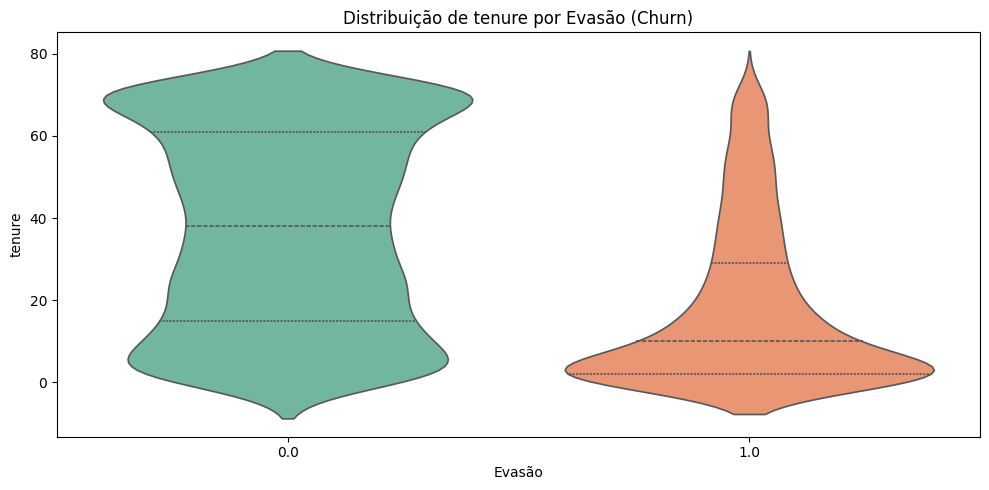

/tmp/ipython-input-13-3456518725.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_transformed, x=churn_column, y=col, inner="quartile", palette="Set2")


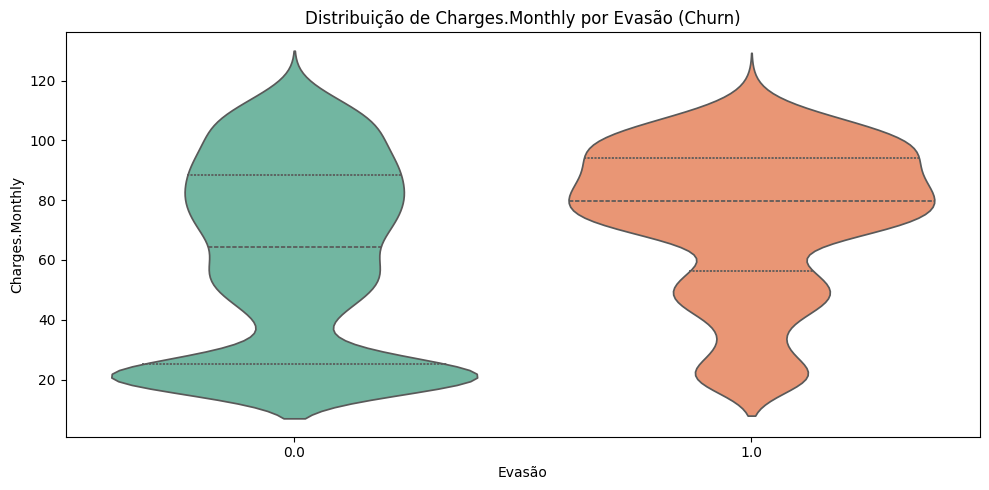

/tmp/ipython-input-13-3456518725.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_transformed, x=churn_column, y=col, inner="quartile", palette="Set2")


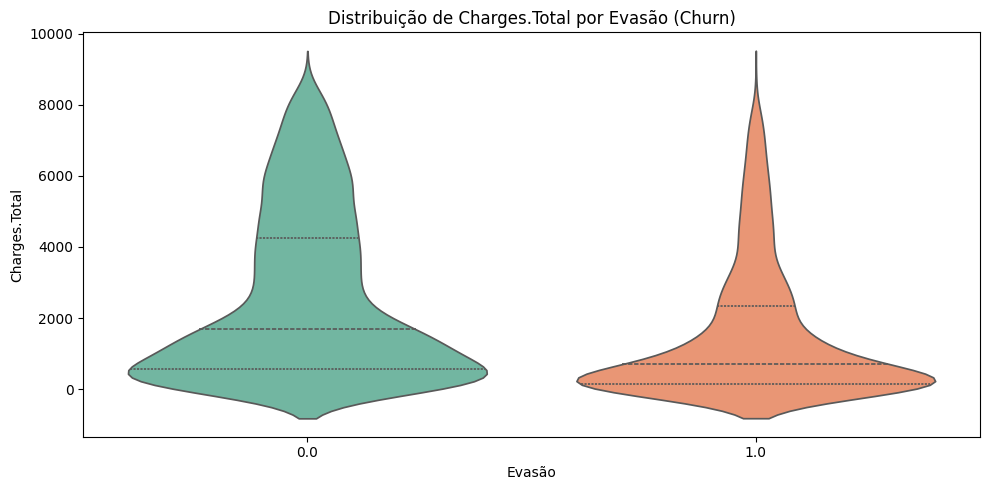

/tmp/ipython-input-13-3456518725.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_transformed, x=churn_column, y=col, inner="quartile", palette="Set2")


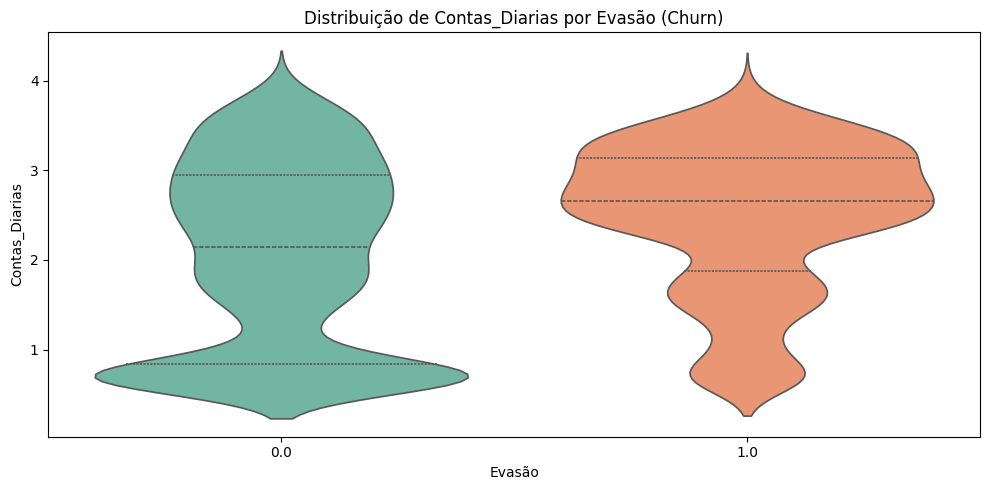

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análise descritiva das variáveis numéricas
print("\nEstatísticas descritivas das variáveis numéricas:")
numerical_columns = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']
desc_stats = df_transformed[numerical_columns].describe()
print(desc_stats.to_markdown())

# Detectando nome da coluna de evasão
churn_column = 'Churn' if 'Churn' in df_transformed.columns else 'Evasao'

# Gráficos de distribuição
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.violinplot(data=df_transformed, x=churn_column, y=col, inner="quartile", palette="Set2")
    plt.title(f"Distribuição de {col} por Evasão ({churn_column})")
    plt.xlabel("Evasão")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

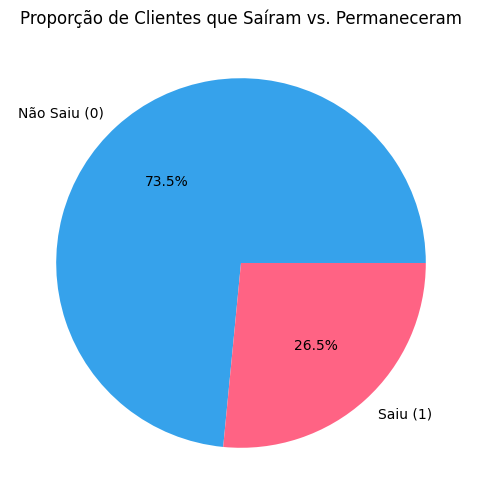

In [14]:
# Calculando churn_dist
churn_dist = df_transformed['Churn'].value_counts(normalize=True)
plt.figure(figsize=(6, 6))
plt.pie(churn_dist, labels=['Não Saiu (0)', 'Saiu (1)'], autopct='%1.1f%%', colors=['#36A2EB', '#FF6384'])
plt.title('Proporção de Clientes que Saíram vs. Permaneceram')
plt.show()

In [15]:
# Análise de churn por variáveis categóricas
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                      'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                      'Contract', 'PaperlessBilling', 'PaymentMethod']

print("Taxa de evasão por variáveis categóricas:")
for col in categorical_columns:
    if col in df_transformed.columns:
        churn_by_category = df_transformed.groupby(col)['Churn'].mean().sort_values()
        print(f"\nTaxa de evasão por {col}:")
        print(churn_by_category.to_markdown())
    else:
        print(f"\nColuna '{col}' não encontrada no DataFrame.")


Taxa de evasão por variáveis categóricas:

Taxa de evasão por gender:
| gender   |    Churn |
|:---------|---------:|
| Male     | 0.261603 |
| Female   | 0.269209 |

Taxa de evasão por SeniorCitizen:
|   SeniorCitizen |    Churn |
|----------------:|---------:|
|               0 | 0.236062 |
|               1 | 0.416813 |

Taxa de evasão por Partner:
|   Partner |    Churn |
|----------:|---------:|
|         1 | 0.196649 |
|         0 | 0.32958  |

Taxa de evasão por Dependents:
|   Dependents |    Churn |
|-------------:|---------:|
|            1 | 0.154502 |
|            0 | 0.312791 |

Taxa de evasão por PhoneService:
|   PhoneService |    Churn |
|---------------:|---------:|
|              0 | 0.249267 |
|              1 | 0.267096 |

Taxa de evasão por MultipleLines:
|   MultipleLines |    Churn |
|----------------:|---------:|
|               0 | 0.250246 |
|               1 | 0.286099 |

Taxa de evasão por InternetService:
| InternetService   |     Churn |
|:----------------

/tmp/ipython-input-16-2252585309.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_contract.index, y=churn_by_contract.values, palette=['#36A2EB', '#FF6384', '#FFCE56'])


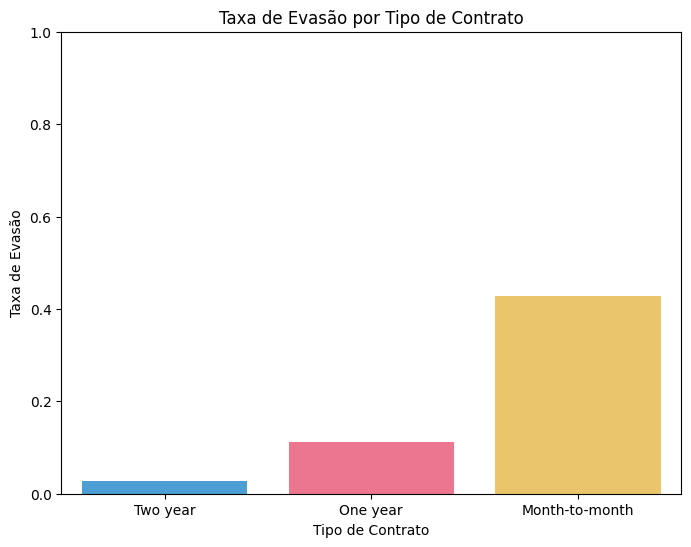

In [16]:
# Gráfico para Tipo de Contrato
churn_by_contract = df_transformed.groupby('Contract')['Churn'].mean().sort_values()
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_by_contract.index, y=churn_by_contract.values, palette=['#36A2EB', '#FF6384', '#FFCE56'])
plt.title('Taxa de Evasão por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Taxa de Evasão')
plt.ylim(0, 1)
plt.show()

/tmp/ipython-input-17-2906975888.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_payment.index, y=churn_by_payment.values, palette=['#36A2EB', '#FF6384', '#FFCE56', '#4BC0C0'])


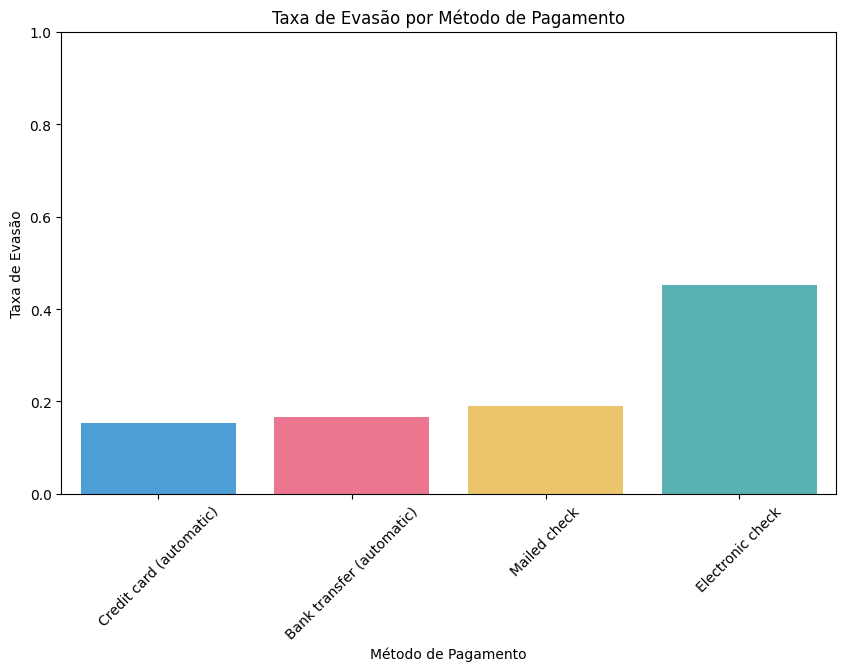

In [17]:
# Gráfico para Método de Pagamento
churn_by_payment = df_transformed.groupby('PaymentMethod')['Churn'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_payment.index, y=churn_by_payment.values, palette=['#36A2EB', '#FF6384', '#FFCE56', '#4BC0C0'])
plt.title('Taxa de Evasão por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Taxa de Evasão')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-18-1528645741.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_internet.index, y=churn_by_internet.values, palette=['#36A2EB', '#FF6384', '#FFCE56'])


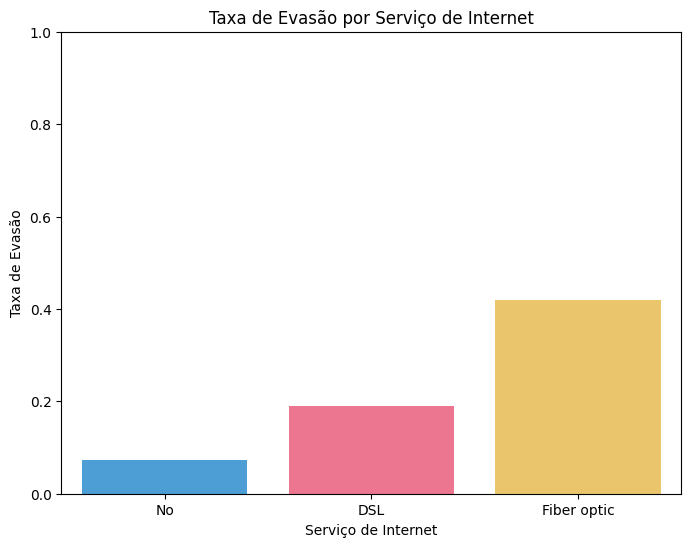

In [18]:
# Gráfico para Serviço de Internet
churn_by_internet = df_transformed.groupby('InternetService')['Churn'].mean().sort_values()
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_by_internet.index, y=churn_by_internet.values, palette=['#36A2EB', '#FF6384', '#FFCE56'])
plt.title('Taxa de Evasão por Serviço de Internet')
plt.xlabel('Serviço de Internet')
plt.ylabel('Taxa de Evasão')
plt.ylim(0, 1)
plt.show()

/tmp/ipython-input-19-1622074524.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_seniorcitizen.index, y=churn_by_seniorcitizen.values, palette=['#36A2EB', '#FF6384'])


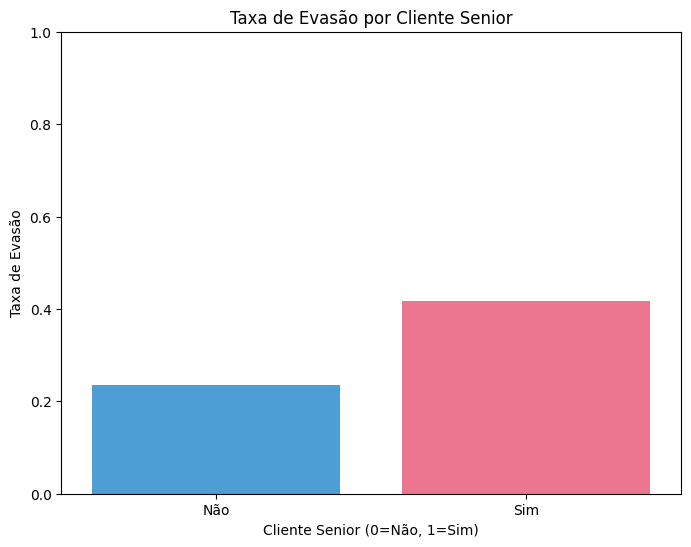

In [19]:
# Gráfico para Clientes Seniores
churn_by_seniorcitizen = df_transformed.groupby('SeniorCitizen')['Churn'].mean().sort_values()
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_by_seniorcitizen.index, y=churn_by_seniorcitizen.values, palette=['#36A2EB', '#FF6384'])
plt.title('Taxa de Evasão por Cliente Senior')
plt.xlabel('Cliente Senior (0=Não, 1=Sim)')
plt.ylabel('Taxa de Evasão')
plt.ylim(0, 1)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

In [20]:
# Análise de variáveis numéricas por Churn
print("Estatísticas de variáveis numéricas por status de Churn:")

# Definindo numerical columns
numerical_columns = ['tenure', 'Charges.Monthly', 'Charges.Total']

# Agrupar por rotatividade e calcular estatísticas descritivas para colunas numéricas
churn_stats = df_transformed.groupby('Churn')[numerical_columns].describe()

# Olhando os resultados
print(churn_stats.to_markdown())

Estatísticas de variáveis numéricas por status de Churn:
|   Churn |   ('tenure', 'count') |   ('tenure', 'mean') |   ('tenure', 'std') |   ('tenure', 'min') |   ('tenure', '25%') |   ('tenure', '50%') |   ('tenure', '75%') |   ('tenure', 'max') |   ('Charges.Monthly', 'count') |   ('Charges.Monthly', 'mean') |   ('Charges.Monthly', 'std') |   ('Charges.Monthly', 'min') |   ('Charges.Monthly', '25%') |   ('Charges.Monthly', '50%') |   ('Charges.Monthly', '75%') |   ('Charges.Monthly', 'max') |   ('Charges.Total', 'count') |   ('Charges.Total', 'mean') |   ('Charges.Total', 'std') |   ('Charges.Total', 'min') |   ('Charges.Total', '25%') |   ('Charges.Total', '50%') |   ('Charges.Total', '75%') |   ('Charges.Total', 'max') |
|--------:|----------------------:|---------------------:|--------------------:|--------------------:|--------------------:|--------------------:|--------------------:|--------------------:|-------------------------------:|------------------------------:|-----------

/tmp/ipython-input-21-1700059112.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df_transformed, palette=['#36A2EB', '#FF6384'])


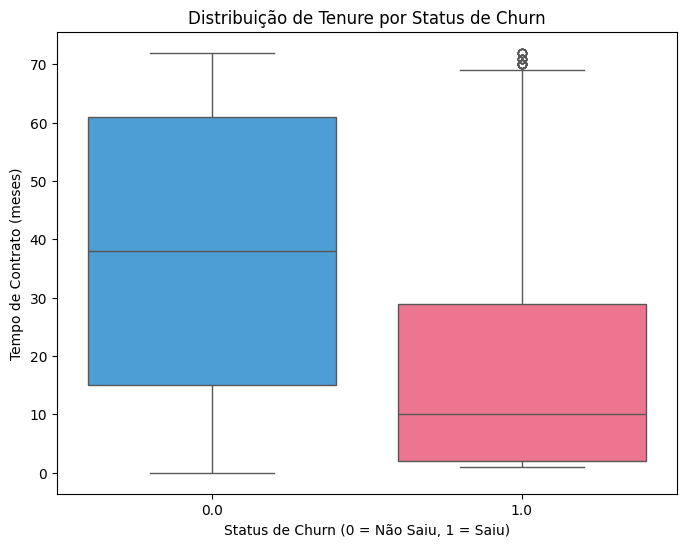

In [21]:
# Boxplot para tenure
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df_transformed, palette=['#36A2EB', '#FF6384'])
plt.title('Distribuição de Tenure por Status de Churn')
plt.xlabel('Status de Churn (0 = Não Saiu, 1 = Saiu)')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()

/tmp/ipython-input-22-1978565885.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Monthly', data=df_transformed, palette=['#36A2EB', '#FF6384'])


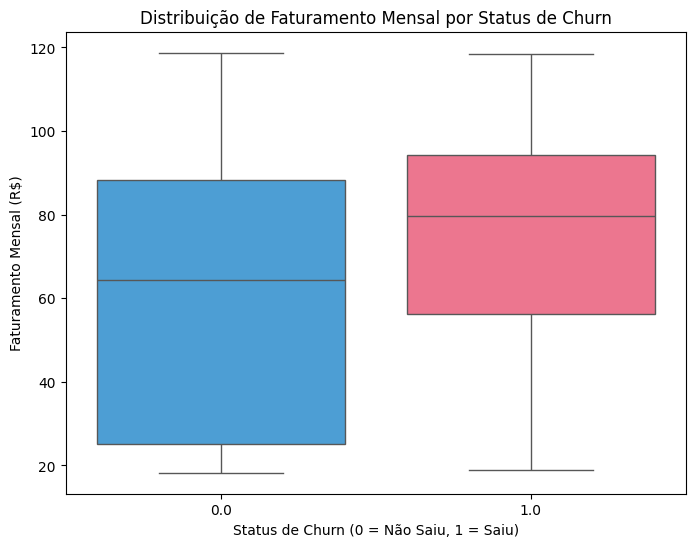

In [22]:
# Boxplot para Charges.Monthly
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Monthly', data=df_transformed, palette=['#36A2EB', '#FF6384'])
plt.title('Distribuição de Faturamento Mensal por Status de Churn')
plt.xlabel('Status de Churn (0 = Não Saiu, 1 = Saiu)')
plt.ylabel('Faturamento Mensal (R$)')
plt.show()

/tmp/ipython-input-23-2145009577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Total', data=df_transformed, palette=['#36A2EB', '#FF6384'])


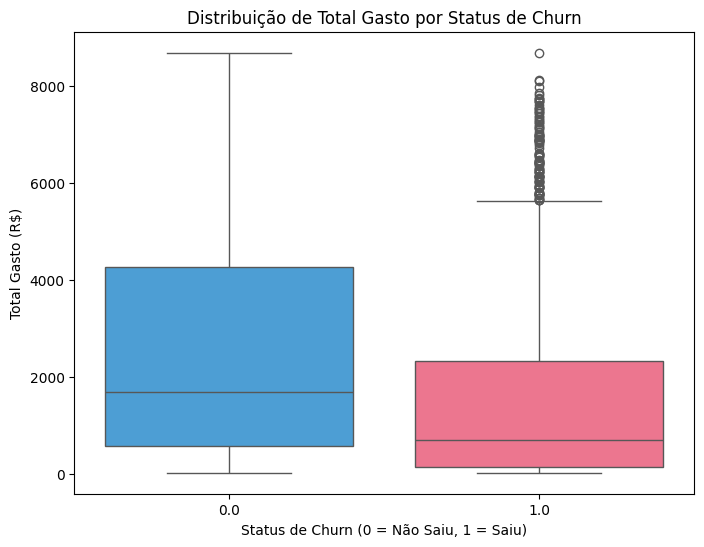

In [23]:
# Boxplot para Charges.Total
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=df_transformed, palette=['#36A2EB', '#FF6384'])
plt.title('Distribuição de Total Gasto por Status de Churn')
plt.xlabel('Status de Churn (0 = Não Saiu, 1 = Saiu)')
plt.ylabel('Total Gasto (R$)')
plt.show()

In [24]:
# Salvando os resultados da análise em um arquivo
with open('churn_analysis_results.txt', 'w') as f:
    f.write("Estatísticas descritivas das variáveis numéricas:\n")
    f.write(desc_stats.to_markdown() + "\n\n")
    f.write("Distribuição de Churn (proporção):\n")
    f.write(churn_dist.to_markdown() + "\n\n")
    f.write("Taxa de evasão por variáveis categóricas:\n")
    for col in categorical_columns:
        churn_by_category = df_transformed.groupby(col)['Churn'].mean().sort_values()
        f.write(f"\nTaxa de evasão por {col}:\n")
        f.write(churn_by_category.to_markdown() + "\n")
    f.write("\nEstatísticas de variáveis numéricas por Churn:\n")
    f.write(churn_stats.to_markdown() + "\n")

#📌 Relatório Final

**INTRODUÇÃO**

O objetivo desse projeto é analisar os fatores que levam clientes de uma empresa de telecomunicações a cancelar seus serviços (churn) e propor ações para reduzir a evasão. Neste projeto foquei em compreender os padrões e fatores que influenciam o churn, sendo essencial para desenvolver estratégias a fim de retenção, melhora na satisfação do cliente e também a otimização


Utilizei um conjunto de dados público (TelecomX_Data.json), que contém informações detalhadas sobre os clientes, incluindo características demográficas, serviços de telefone e internet, contratos etc. O foco é identificar os principais drivers de churn e propor recomendações baseadas em insights extraídos dos dados.

**LIMPEZA E TRATAMENTO DE DADOS**


* Os dados foram importados de um arquivo JSON.

* O dataframe inicial continha colunas aninhadas nas categorias customer, phone, internet e account, que armazenavam informações em formato de dicionário.

* Foram desaninhadas colunas como customer, phone, internet e account.

* As variáveis foram renomeadas, tratadas (tipos e valores ausentes) e combinadas em um único DataFrame para análise.

* Análise Exploratória

Na análise exploratória, identifiquei padrões e fatores associados ao churn, onde:
Churn geral: Aproximadamente 26% dos clientes cancelaram o serviço.

**Fatores principais:**
Foram analisadas as taxas de churn para variáveis categóricas, como Contract, InternetService, PaymentMethod, entre outras. Onde:

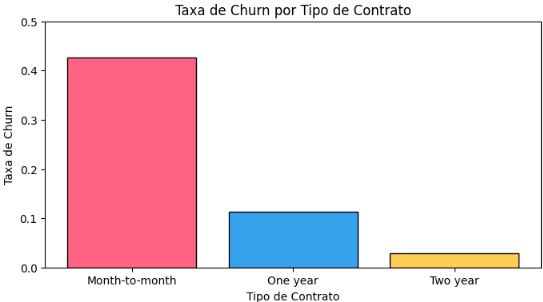

**Insight:** Clientes com contratos de curto prazo (mês a mês) têm uma taxa de churn significativamente maior (42,7%) em comparação com contratos de um ano (11,3%) e dois anos (2,8%). Isso sugere que contratos mais longos promovem maior fidelidade.

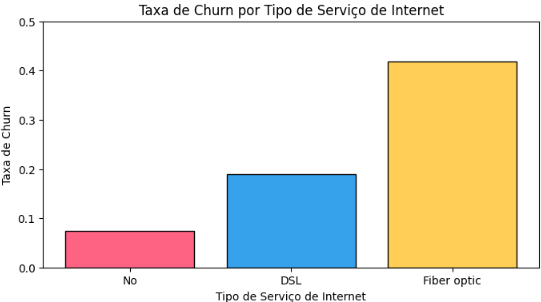

**Insight:** Clientes com serviço de internet de fibra óptica apresentam a maior taxa de churn (41,9%), seguidos por DSL (18,9%) e clientes sem internet (7,4%). Isso pode indicar problemas com a qualidade ou preço do serviço de fibra óptica.

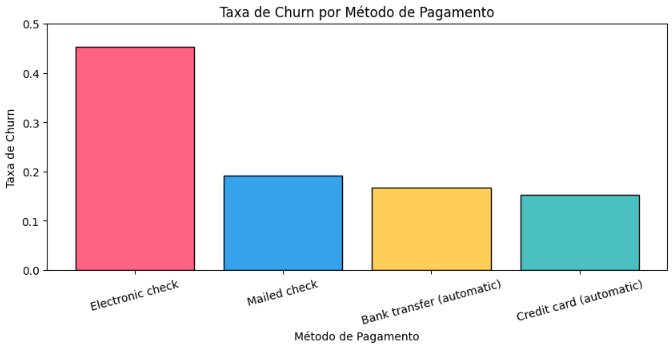

**Insight:** Clientes que utilizam cheques eletrônicos têm a maior taxa de churn (45,3%), enquanto métodos automáticos, como transferência bancária (16,7%) e cartão de crédito (15,2%), apresentam taxas menores. Isso pode refletir maior conveniência ou confiança em métodos automáticos.

**CONCLUSÕES E INSIGHTS**

A análise revelou os seguintes insights principais:

* **Contratos de Curto Prazo Aumentam o Churn:** Clientes com contratos mês a mês têm uma taxa de churn significativamente maior (42,7%) do que aqueles com contratos de longo prazo. Isso sugere que a falta de compromisso contratual facilita a saída.


* **Serviço de Fibra Óptica Está Associado a Maior Churn:** Clientes com internet de fibra óptica apresentam a maior taxa de churn (41,9%), possivelmente devido a problemas de qualidade, preço elevado ou expectativas não atendidas.


* **Métodos de Pagamento Influenciam a Retenção:** Clientes que utilizam cheques eletrônicos têm maior probabilidade de churn (45,3%), enquanto métodos automáticos estão associados a maior retenção.


* **Tempo de Contrato e Custos Mensais São Críticos:** Clientes com menor tempo de contrato e custos mensais mais altos tendem a abandonar os serviços, indicando que a percepção de valor é um fator determinante.


* **Serviços Adicionais Podem Reduzir o Churn:** Clientes com serviços como OnlineSecurity e TechSupport apresentam taxas de churn menores, sugerindo que serviços de suporte agregam valor à experiência do cliente.

# **RECOMENDAÇÕES E POSSÍVEIS SOLUÇÕES**

Com base no que foi analisado, as melhores formas de solucionar os problemas mostrados e reduzir a evasão seriam:


* **INCENTIVAR CONTRATOS DE LONGO PRAZO**

Pois, oferecendo descontos ou mesmo benefícios extras em contratos mais longos, de 1 ou 2 anos, ajudaria a reter os clientes. Se houver um bom marketing destacando os benefícios e a economia atrelada a planos mais longos, o cliente se interessará.

* **MELHORAR A QUALIDADE DO SERVIÇO DE FIBRA ÓPTICA**

Realizar pesquisas de satisfação específicas para os clientes a fim de compreender o motivo da evasão pela insatisfação de fibra óptica e implementar melhorias na infraestrutura.

* **PROMOVER MÉTODOS DE PAGAMENTO AUTOMÁTICOS**

Implementar benefícios em caso de adoção de cartão de crédito automático ou débito automático, como cashback. Isso ajuda para que o cliente não dependa da burocracia na hora do pagamento.

* **APLICAR MODELOS PREDITIVOS**

Utilizar machine learning para identificar os clientes em risco com base em variáveis (como as analisadas nesse projeto) para monitorar esses clientes e alertar para a equipe de retenção contatarem esses clientes de alta probabilidade de churn.

